In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model. 

import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from dmba import regressionSummary

In [42]:
booking_df = pd.read_csv("train.csv", index_col='id')
test_df = pd.read_csv("test.csv", index_col='id')
booking_df.head()
# test_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [43]:
!pip install pycaret

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [4585 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
        Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
        Using cached setuptools-67.4.0-py3-none-any.whl (1.1 MB)
  

            _configtest.c:1:5: note: 'atan2' is a builtin with type 'double (double, double)'
            1 warning generated.
            clang _configtest.o -o _configtest
            success!
            removing: _configtest.c _configtest.o _configtest.o.d _configtest
            C compiler: clang -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -arch arm64 -arch x86_64 -g
           
            compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Frameworks/Python.framework/Versions/3.11/include/python3.11 -c'
            clang: _configtest.c
            _configtest.c:1:5: warning: incompatible redeclaration of library function 'pow' [-Wincompatible-library-redeclaration]
            int pow (void);
                ^
            _configtest.c:1:5: note: 'pow' is a builtin with type 'double (double, double)'
        

            compile options: '-Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/src/common -Inumpy/core/include -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/include/numpy -Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Frameworks/Python.framework/Versions/3.11/include/python3.11 -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/src/common -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/src/npymath -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/src/common -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/src/npymath -c'
            clang: build/src.macosx-10.9-universal2-3.1/numpy/core/src/npysort/quicksort.cclang: build/src.macosx-10.9-universal2-3.1/numpy/core/src/npysort/mergesort.c
            clang: build/src.macosx-10.9-universal2-3.1/numpy/core/src/npysort/timsort.c
           
            clang: build/src.macosx-10.9-universal2-3.1/numpy/core/src/npysor

In [17]:
booking_df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [5]:
booking_df = pd.get_dummies(train_df, prefix_sep='_', drop_first=True)

In [8]:
booking_df= booking_df.dropna()

In [18]:
outcome = 'booking_status'
predictors = [s for s in booking_df.columns if s not in outcome]

booking_predictors = booking_df[predictors]
booking_outcome = booking_df[outcome]
#test_predictors = [s for s in test_df.columns if s not in outcome]
#test_outcome = test_df[outcome]

print(predictors)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [19]:
trainData, validData = train_test_split(train_df, test_size=0.40, random_state=1)
excludeColumns = ('booking_status')

predictors = [s for s in train_df.columns if s not in excludeColumns]
outcome = 'booking_status'

X = train_df[predictors]
y = train_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


lin_model = LinearRegression()
lin_model.fit(train_X, train_y)


train_pred = lin_model.predict(train_X)
print('Actual, Predicted, and Residual Values for MVALUE in Training Set')
print()
train_results = pd.DataFrame({
    'booking_status': train_y, 
    'Predicted': train_pred, 
    'Residual': train_y - train_pred
})
print(train_results.head())

Actual, Predicted, and Residual Values for MVALUE in Training Set

       booking_status  Predicted  Residual
id                                        
26748               1   0.998027  0.001973
10969               0  -0.091033  0.091033
6989                0   0.563307 -0.563307
8638                1   0.552774  0.447226
5835                0   0.048527 -0.048527


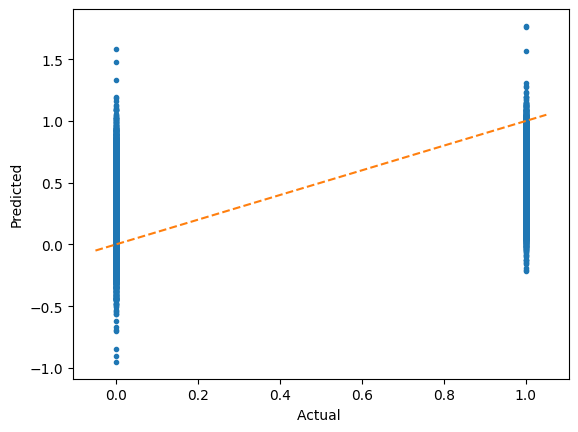

In [21]:
plt.plot(train_results.booking_status, train_results.Predicted, '.')
plt.xlabel('Actual ')  # set x-axis label
plt.ylabel('Predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

In [22]:
trainData= train_df.sample(frac=0.6, random_state=1)
validData = train_df.drop(trainData.index)

valid_pred = lin_model.predict(valid_X)
valid_results = pd.DataFrame({
    'booking_status': valid_y, 
    'Predicted': valid_pred, 
    'Residual': valid_y - valid_pred
})
print('Actual, Predicted, and Residual Values for TOTAL_VALUE in Validation Set')
print()
print(valid_results.head())

Actual, Predicted, and Residual Values for TOTAL_VALUE in Validation Set

       booking_status  Predicted  Residual
id                                        
37633               0   0.353197 -0.353197
24516               0   0.138864 -0.138864
31459               1   0.695420  0.304580
24091               0   0.294162 -0.294162
13874               0   0.564848 -0.564848


In [23]:
outcome = 'booking_status'
X = train_df[predictors]
y = train_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y
# and LinearRegression() function from sklearn (skikit-learn) 
# library.
house_lm = LinearRegression()
house_lm.fit(train_X, train_y)

# Display intercept and regression coefficients. Round
# them to 2 decimals.
print('Regression Model for Boston Housing Market')
print()
print('Intercept: ', np.round(house_lm.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': np.round(house_lm.coef_, 2)}))


Regression Model for Boston Housing Market

Intercept:  -131.42
                               Predictor  Coefficient
0                           no_of_adults         0.01
1                         no_of_children         0.03
2                   no_of_weekend_nights         0.01
3                      no_of_week_nights         0.01
4                      type_of_meal_plan         0.00
5             required_car_parking_space        -0.18
6                     room_type_reserved        -0.04
7                              lead_time         0.00
8                           arrival_year         0.07
9                          arrival_month        -0.00
10                          arrival_date         0.00
11                   market_segment_type         0.20
12                        repeated_guest        -0.30
13          no_of_previous_cancellations         0.01
14  no_of_previous_bookings_not_canceled         0.00
15                    avg_price_per_room         0.00
16                

In [24]:
# Identify and display the metrics that scikit-learn provides.
print('Training set r2: ', r2_score(train_results.booking_status, train_results.Predicted))
print('Validation set r2: ', r2_score(valid_results.booking_status, valid_results.Predicted))

Training set r2:  0.30080129064916983
Validation set r2:  0.30235808791162966


In [25]:
# Use and display regressionSummary() for training set.
print('Accuracy Performance Measures for Trainining Set')
regressionSummary(train_results.booking_status, train_results.Predicted)
print()

# Use and display regressionSummary() for validation set.
print('Accuracy Performance Measures for Validation Set')
regressionSummary(valid_results.booking_status, valid_results.Predicted)

Accuracy Performance Measures for Trainining Set

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.4085
     Mean Absolute Error (MAE) : 0.3489

Accuracy Performance Measures for Validation Set

Regression statistics

               Mean Error (ME) : -0.0009
Root Mean Squared Error (RMSE) : 0.4074
     Mean Absolute Error (MAE) : 0.3484


In [26]:
# Define train_model() function used in Forward Selection
# algorithm with forward_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use forward_selection() function to identify the
# best_model and best_variables.
best_model_fs, best_variables_fs = forward_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Forward Selection algorithm.
print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests
Start: score=35493.85, constant
Step: score=31724.95, add lead_time
Step: score=30397.11, add no_of_special_requests
Step: score=28431.12, add avg_price_per_room
Step: score=27129.23, add market_segment_type
Step: score=26804.77, add repeated_guest
Step: score=26692.17, add required_car_parking_space
Step: score=26604.48, add arrival_year
Step: score=26525.83, add room_type_reserved
Step: score=26502.09, add no_of_weekend_nights
Step: score=26493.80, add no_of_children
Step: score=26487.95, add no_of_week_nights
Step: score=26483.92, add no_of_adults
Step: score=26483.73, add arrival_month
Step: score=26483.73, add None

Best Variables from 

In [27]:
# Define train_model() function used in Executive Search
# algorithm with executive_search() function. 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Executive Search
# algorithm with executive_search() function. 
def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # Apply negative sign as score is optimized to be 
    # as low as possible in exhaustive_search() function.
    return -adjusted_r2_score(train_y, pred_y, model)

# Create allVariables object with predcitors in train_X,
# i.e., training data set, with 11 predictor columns and 
# 600 records.
allVariables = train_X.columns

# The exhaustive_search() function consists of 3 arguments:
# - allVariables - list of all variables in training data set,
# - train_model() function that creates a model for a specific 
#    combination of variables,
# - score_model() function that score the model performance using
#     adjusted_r2.
results = exhaustive_search(allVariables, train_model, score_model)

# Create data[] loop process to identify and append the best model 
# for each combination of 1, 2, 3, ..., 11 variables with their 
# respective number of variables (n), adjusted R_squared (r2adj) and
# AIC. 
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

# Define the width of output presentation to be wider
# to display results in two rows (instead of more rows
# otherwise). 
pd.set_option('display.width', 100)

# Display the Exhaustive Search results.
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))

# Reset the output width to the default. 
pd.reset_option('display.width')

# arrival_year, avg_price_per_room, lead_time, market_segment_type, no_of_special_requests, no_of_weekend_nights, repeated_guest, required_car_parking_space, room_type_reserved

     n     r2adj           AIC  arrival_date  arrival_month  arrival_year  avg_price_per_room  \
0    1  0.138641  31724.948830         False          False         False               False   
1    2  0.182783  30397.108157         False          False         False               False   
2    3  0.244005  28431.115454         False          False         False                True   
3    4  0.282010  27129.234609         False          False         False                True   
4    5  0.291201  26804.766891         False          False         False                True   
5    6  0.294382  26692.166904         False          False         False                True   
6    7  0.296855  26604.484366         False          False          True                True   
7    8  0.299069  26525.830759         False          False          True                True   
8    9  0.299755  26502.087545         False          False          True                True   
9   10  0.300012  26493.796681

# Neural Network

In [40]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler
from dmba import classificationSummary, regressionSummary

In [32]:
outcome = 'booking_status'
predictors = [s for s in booking_df.columns if s != outcome]


X = booking_df[predictors]
y = booking_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

sc_X = StandardScaler()
train_X_sc = sc_X.fit_transform(train_X)
valid_X_sc = sc_X.transform(valid_X)

train_X_sc_df = np.round(pd.DataFrame(train_X_sc), decimals=3) 
#train_X_sc_df.columns=['CRIME', 'ZONE', 'INDUST', 'NIT_OXIDE', 'ROOMS', 'AGE', 'DISTANCE',
#       'RADIAL', 'TAX', 'ST_RATIO', 'LOW_STAT', 'CHAR_RIV_Y',
#       'C_MVALUE_Yes']

print('Scaled Predictors for Training Partition')
print(train_X_sc_df.head(10))

Scaled Predictors for Training Partition
      0      1      2      3      4      5      6      7      8      9   \
0  0.154 -0.312 -0.998  1.126 -0.407 -0.161 -0.515  4.059  0.409  0.496   
1 -1.757 -0.312  0.133 -0.280 -0.407 -0.161  4.299 -0.837  0.409 -0.563   
2 -1.757 -0.312  0.133 -1.685 -0.407 -0.161 -0.515 -0.159  0.409  0.143   
3  0.154 -0.312  1.264  1.126 -0.407 -0.161 -0.515  0.692  0.409 -0.917   
4  0.154 -0.312  0.133  0.423 -0.407 -0.161 -0.515  0.088 -2.447  0.849   
5  0.154 -0.312  1.264  3.234  1.289 -0.161 -0.515  0.470  0.409  0.143   
6  0.154 -0.312  0.133 -0.280 -0.407 -0.161 -0.515  1.703  0.409  0.143   
7  0.154 -0.312  0.133 -0.982 -0.407 -0.161 -0.515  0.174  0.409 -0.563   
8  0.154 -0.312 -0.998 -0.982  2.985 -0.161 -0.515 -0.048  0.409  0.849   
9 -1.757 -0.312 -0.998 -0.982 -0.407 -0.161 -0.515  1.740  0.409 -0.210   

      10     11    12     13     14     15     16  
0 -0.892 -1.138 -0.17 -0.061 -0.102 -0.922 -0.737  
1  0.345 -1.138 -0.17 -0.061 

In [36]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 21)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py

Best score:0.7650
Best parameter:  {'hidden_layer_sizes': 8}


In [38]:
# Use MLPCclassifier() function to train the improved neural network model
# based on grid search results. 

# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (7); 
# (b) single hidden layer with 10 nodes based on grid search; 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (3);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
booking_clf_imp = MLPClassifier(hidden_layer_sizes=(8), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
booking_clf_imp.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(booking_clf_imp.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(booking_clf_imp.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([ 0.17372493, -0.0635917 ,  0.20565033,  0.13984024,  0.03181428,
       -0.20565198, -0.24894815, -0.21420049]), array([0.12579855])]

Network Weights for Accidents Neural Network Model
[array([[-0.04693944,  0.12434511, -0.28277801, -0.11168926, -0.19982504,
        -0.23060811, -0.17747802, -0.08736404],
       [-0.05839713,  0.02195658, -0.04571049,  0.10479203, -0.16718705,
         0.21389552, -0.26734995,  0.09643099],
       [-0.04677947,  0.03301933, -0.20342787, -0.17072392,  0.17012682,
         0.26488875, -0.10554322,  0.1087941 ],
       [ 0.21291786,  0.22286408, -0.23473444, -0.26058369, -0.18677212,
         0.2139097 , -0.22720934, -0.04462827],
       [ 0.25902143,  0.01869208,  0.10854209, -0.10437112,  0.10550086,
         0.18929286, -0.2724973 ,  0.14150299],
       [ 0.27654159,  0.14039818, -0.12419963,  0.1636299 , -0.22444926,
        -0.02947587,  0.23113652, -0.11674947],
       [-0.1200524 , -0.209

In [41]:
# Confusion matrices for improved neural network model for Accidents
# using grid search results. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, booking_clf_imp.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, booking_clf_imp.predict(valid_X))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.6067)

       Prediction
Actual     0     1
     0 15325     0
     1  9935     0

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.6099)

       Prediction
Actual     0     1
     0 10271     0
     1  6569     0


In [33]:
booking_reg = MLPRegressor(hidden_layer_sizes=(9), 
                solver='lbfgs', max_iter=10000, random_state=1)
booking_reg.fit(train_X_sc, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Boston Housing Neural Network Model')
print(booking_reg.intercepts_)

print()
print('Network Weights for Boston Housing Neural Network Model')
print(booking_reg.coefs_)


Final Intercepts for Boston Housing Neural Network Model
[array([-1.36062589, -0.93959466,  0.74072493,  0.77353779, -1.19522754,
        0.70750934,  0.34562998,  0.43588856,  0.10821186]), array([0.49490969])]

Network Weights for Boston Housing Neural Network Model
[array([[-0.33185916,  0.24085443,  0.40976564, -0.15648619, -0.19641392,
        -0.17456933,  0.08030556,  0.03464482, -0.16658843],
       [ 0.02605298, -0.23906225, -0.02092706,  0.12662062,  0.07509341,
         0.09493107, -0.02141472,  0.00343283, -0.16765007],
       [-0.04709594,  0.17889065,  0.08965846, -0.2301594 , -0.07107823,
        -0.07294698,  0.09024875,  0.05538519, -0.04634849],
       [ 0.05936431, -0.00412733,  0.04674926, -0.11711472,  0.03971131,
         0.04795409, -0.04784949,  0.03054179, -0.1068787 ],
       [ 0.09636442, -0.31586003, -0.27084247,  0.35706095,  0.08633244,
         0.13623616, -0.08489966,  0.00246185, -0.21617421],
       [-0.05670826,  0.07484302,  0.16177622,  0.07979279, 

In [34]:
price_pred = np.round(booking_reg.predict(valid_X_sc), decimals=2)

# Create data frame to display prediction results for
# validation set. 
price_pred_result = pd.DataFrame({'Actual': valid_y, 
                'Prediction': price_pred, 'Residual': valid_y-price_pred})

print('Predictions for Toyota Price for Validation Partition')
print(price_pred_result.head(5))

Predictions for Toyota Price for Validation Partition
       Actual  Prediction  Residual
id                                 
37633       0        0.33     -0.33
24516       0        0.04     -0.04
31459       1        0.87      0.13
24091       0        0.18     -0.18
13874       0        0.62     -0.62


In [35]:
# Identify and display neural network model accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Neural Network')
regressionSummary(train_y, booking_reg.predict(train_X_sc))

# Identify and display neural network accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Neural Network')
regressionSummary(valid_y, booking_reg.predict(valid_X_sc))

Accuracy Measures for Training Partition for Neural Network

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.3824
     Mean Absolute Error (MAE) : 0.3006

Accuracy Measures for Validation Partition for Neural Network

Regression statistics

               Mean Error (ME) : -0.0010
Root Mean Squared Error (RMSE) : 0.3827
     Mean Absolute Error (MAE) : 0.3007
